In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
def plot_confusion_matrix(fig, ax, cm, classes,
                          title='Normalized confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    im.set_clim(0, 1)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

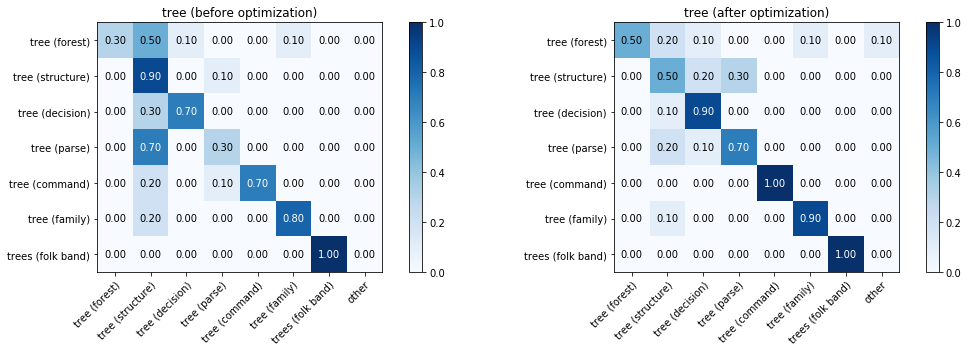

In [3]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
classes = ['tree (forest)', 'tree (structure)', 'tree (decision)', 'tree (parse)',
           'tree (command)', 'tree (family)', 'trees (folk band)', 'other']
cm = np.array([[0.3, 0.5, 0.1, 0, 0, 0.1, 0, 0],
               [0, 0.9, 0, 0.1, 0, 0, 0, 0],
               [0, 0.3, 0.7, 0, 0, 0, 0, 0],
               [0, 0.7, 0, 0.3, 0, 0, 0, 0],
               [0, 0.2, 0, 0.1, 0.7, 0, 0, 0],
               [0, 0.2, 0, 0, 0, 0.8, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, 0]])
plot_confusion_matrix(fig, ax0, cm, classes, title="tree (before optimization)")

cm_opt = np.array([[0.5, 0.2, 0.1, 0, 0, 0.1, 0, 0.1],
                   [0, 0.5, 0.2, 0.3, 0, 0, 0, 0],
                   [0, 0.1, 0.9, 0, 0, 0, 0, 0],
                   [0, 0.2, 0.1, 0.7, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0],
                   [0, 0.1, 0, 0, 0, 0.9, 0, 0],
                   [0, 0, 0, 0, 0, 0, 1, 0]])
plot_confusion_matrix(fig, ax1, cm_opt, classes, title="tree (after optimization)")
fig.savefig('cm_tree.png')

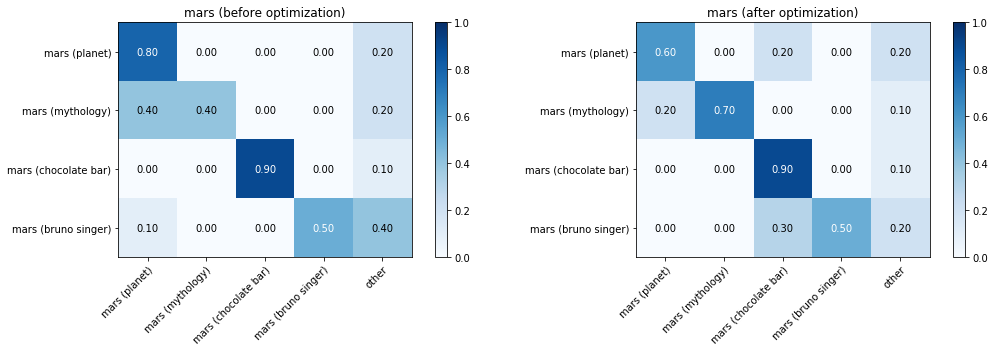

In [4]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
classes = ['mars (planet)', 'mars (mythology)', 'mars (chocolate bar)', 
           'mars (bruno singer)', 'other']
cm = np.array([[0.8, 0, 0, 0, 0.2],
               [0.4, 0.4, 0, 0, 0.2],
               [0, 0, 0.9, 0, 0.1],
               [0.1, 0, 0, 0.5, 0.4]])
plot_confusion_matrix(fig, ax0, cm, classes, title="mars (before optimization)")

cm_opt = np.array([[0.6, 0, 0.2, 0, 0.2],
                   [0.2, 0.7, 0, 0, 0.1],
                   [0, 0, 0.9, 0, 0.1],
                   [0, 0, 0.3, 0.5, 0.2]])
plot_confusion_matrix(fig, ax1, cm_opt, classes, title="mars (after optimization)")
fig.savefig('cm_mars.png')

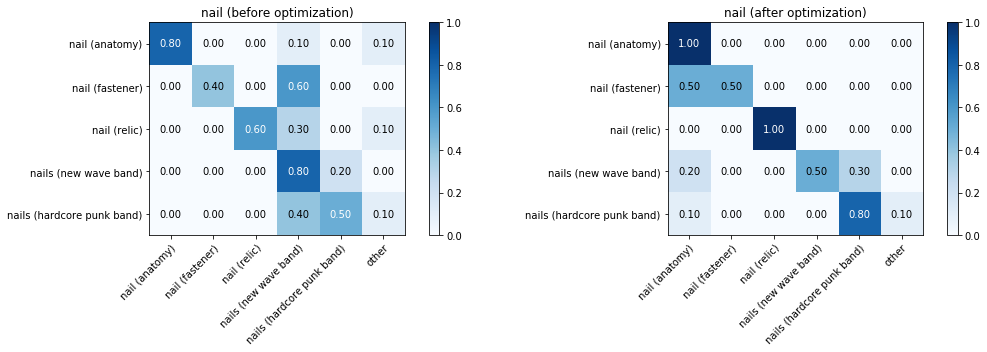

In [3]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
classes = ['nail (anatomy)', 'nail (fastener)', 'nail (relic)', 
           'nails (new wave band)', 'nails (hardcore punk band)', 'other']
cm = np.array([[0.8, 0, 0, 0.1, 0, 0.1],
               [0, 0.4, 0, 0.6, 0, 0],
               [0, 0, 0.6, 0.3, 0, 0.1],
               [0, 0, 0, 0.8, 0.2, 0],
               [0, 0, 0, 0.4, 0.5, 0.1]])
plot_confusion_matrix(fig, ax0, cm, classes, title="nail (before optimization)")

cm_opt = np.array([[1, 0, 0, 0, 0, 0],
                   [0.5, 0.5, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0],
                   [0.2, 0, 0, 0.5, 0.3, 0],
                   [0.1, 0, 0, 0, 0.8, 0.1]])
plot_confusion_matrix(fig, ax1, cm_opt, classes, title="nail (after optimization)")
fig.savefig('cm_nail.png')

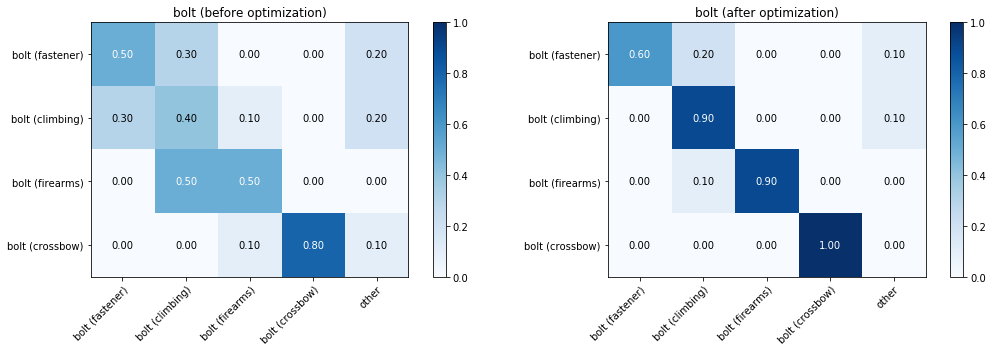

In [6]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
classes = ['bolt (fastener)', 'bolt (climbing)', 'bolt (firearms)', 
           'bolt (crossbow)', 'other']
cm = np.array([[0.5, 0.3, 0, 0, 0.2],
               [0.3, 0.4, 0.1, 0, 0.2],
               [0, 0.5, 0.5, 0, 0],
               [0, 0, 0.1, 0.8, 0.1]])
plot_confusion_matrix(fig, ax0, cm, classes, title="bolt (before optimization)")

cm_opt = np.array([[0.6, 0.2, 0, 0, 0.1],
                   [0, 0.9, 0, 0, 0.1],
                   [0, 0.1, 0.9, 0, 0],
                   [0, 0, 0, 1, 0]])
plot_confusion_matrix(fig, ax1, cm_opt, classes, title="bolt (after optimization)")
fig.savefig('cm_bolt.png')

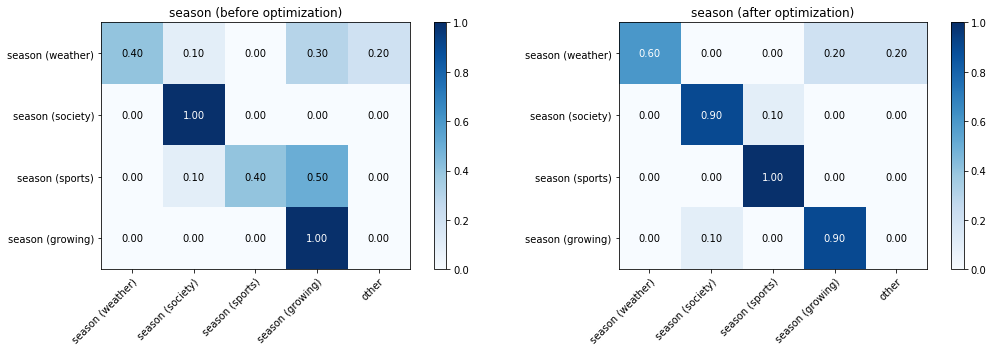

In [7]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
classes = ['season (weather)', 'season (society)', 'season (sports)', 
           'season (growing)', 'other']
cm = np.array([[0.4, 0.1, 0, 0.3, 0.2],
               [0, 1, 0, 0, 0],
               [0, 0.1, 0.4, 0.5, 0],
               [0, 0, 0, 1, 0]])
plot_confusion_matrix(fig, ax0, cm, classes, title="season (before optimization)")

cm_opt = np.array([[0.6, 0, 0, 0.2, 0.2],
                   [0, 0.9, 0.1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0.1, 0, 0.9, 0]])
plot_confusion_matrix(fig, ax1, cm_opt, classes, title="season (after optimization)")
fig.savefig('cm_season.png')

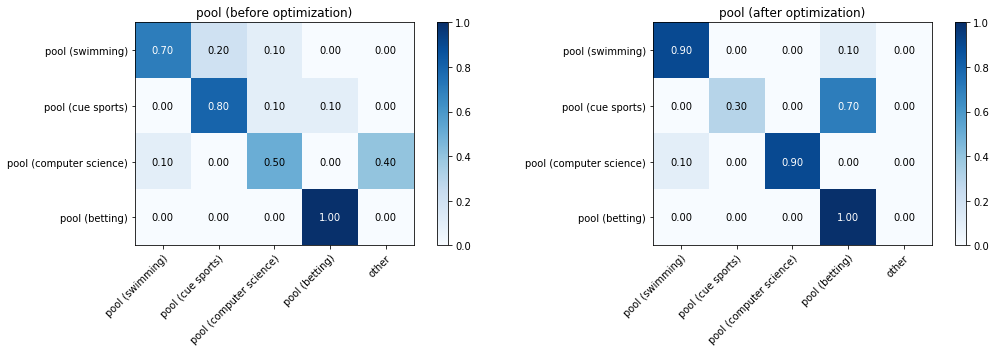

In [8]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
classes = ['pool (swimming)', 'pool (cue sports)', 'pool (computer science)', 
           'pool (betting)', 'other']
cm = np.array([[0.7, 0.2, 0.1, 0, 0],
               [0, 0.8, 0.1, 0.1, 0],
               [0.1, 0, 0.5, 0, 0.4],
               [0, 0, 0, 1, 0]])
plot_confusion_matrix(fig, ax0, cm, classes, title="pool (before optimization)")

cm_opt = np.array([[0.9, 0, 0, 0.1, 0],
                   [0, 0.3, 0, 0.7, 0],
                   [0.1, 0, 0.9, 0, 0],
                   [0, 0, 0, 1, 0]])
plot_confusion_matrix(fig, ax1, cm_opt, classes, title="pool (after optimization)")
fig.savefig('cm_pool.png')